# Oil Production

Source: https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=WCRFPUS2&f=W

Historical prices for electricity, natural gas, heating oil, diesel also available.
'Gasoline-M','Electricity-M', etc.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import mpld3
import numpy as np
import pandas as pd
import os, sys
import warnings

sns.set_context("poster", font_scale=1.3)

In [3]:
!which minimalnb

In [2]:
def load_monthly_data(force=False):
    """Download and transform data if forced or if cleaned version not available."""
    clean_file = "../data/processed/monthly_clean.csv"
    if not os.path.isfile(clean_file) or force:
        monthly = pd.read_excel("https://www.eia.gov/dnav/pet/hist_xls/WCRFPUS2w.xls", 
                                sheetname=1,
                                header=2,
                                index_col='Date')
        monthly.columns = ["Weekly Crude Oil Field Production"]
        monthly.to_csv(clean_file)
    else:
        monthly = pd.read_csv(clean_file, index_col='Date', parse_dates=True)
    return monthly

def load_yearly_data(force=False):
    """Download and transform data if forced or if cleaned version not available."""
    clean_file = "../data/processed/yearly_clean.csv"
    if not os.path.isfile(clean_file) or force:
        yearly = pd.read_excel("https://www.eia.gov/dnav/pet/hist_xls/MCRFPUS2a.xls",
                               sheetname=1,
                               header=2,
                               index_col='Date')

        yearly.columns = ["Annual Crude Oil Field Production"]
        yearly.to_csv(clean_file)
    else:
        yearly = pd.read_csv(clean_file, index_col='Date', parse_dates=True)
    return yearly

def load_crude_prices(force=False):
    """Download and transform data if forced or if cleaned version not available."""
    # https://www.eia.gov/outlooks/steo/realprices/
    clean_file = "../data/processed/crude_prices_clean.csv"
    if not os.path.isfile(clean_file) or force:
        crude_prices = pd.read_excel("https://www.eia.gov/outlooks/steo/realprices/real_prices.xlsx",
                        sheetname='Crude Oil-M',
                        header=39)
        crude_prices = crude_prices[crude_prices.Real.notnull()]
        crude_prices = crude_prices.rename(columns={"Unnamed: 4":"Forecast",
                                                    "Index (1982-84=1)":"CPI",
                                                    "Month": "Date",
                                                   })
        crude_prices = crude_prices.set_index('Date')
        crude_prices.index = pd.to_datetime(crude_prices.index)
        crude_prices.to_csv(clean_file)
    else:
        crude_prices = pd.read_csv(clean_file, index_col='Date', parse_dates=True)
    return crude_prices

## Load data

In [4]:
!mkdir -p ../data/processed/

In [5]:
monthly = load_monthly_data()
yearly = load_yearly_data()
crude_prices = load_crude_prices()

## Plot settings

In [6]:
ylabel_thousands_per_day = r"Barrels per Day $\left[\mathrm{Thousands}\right]$"
title_oil_per_year = "U.S. Field Oil Production"

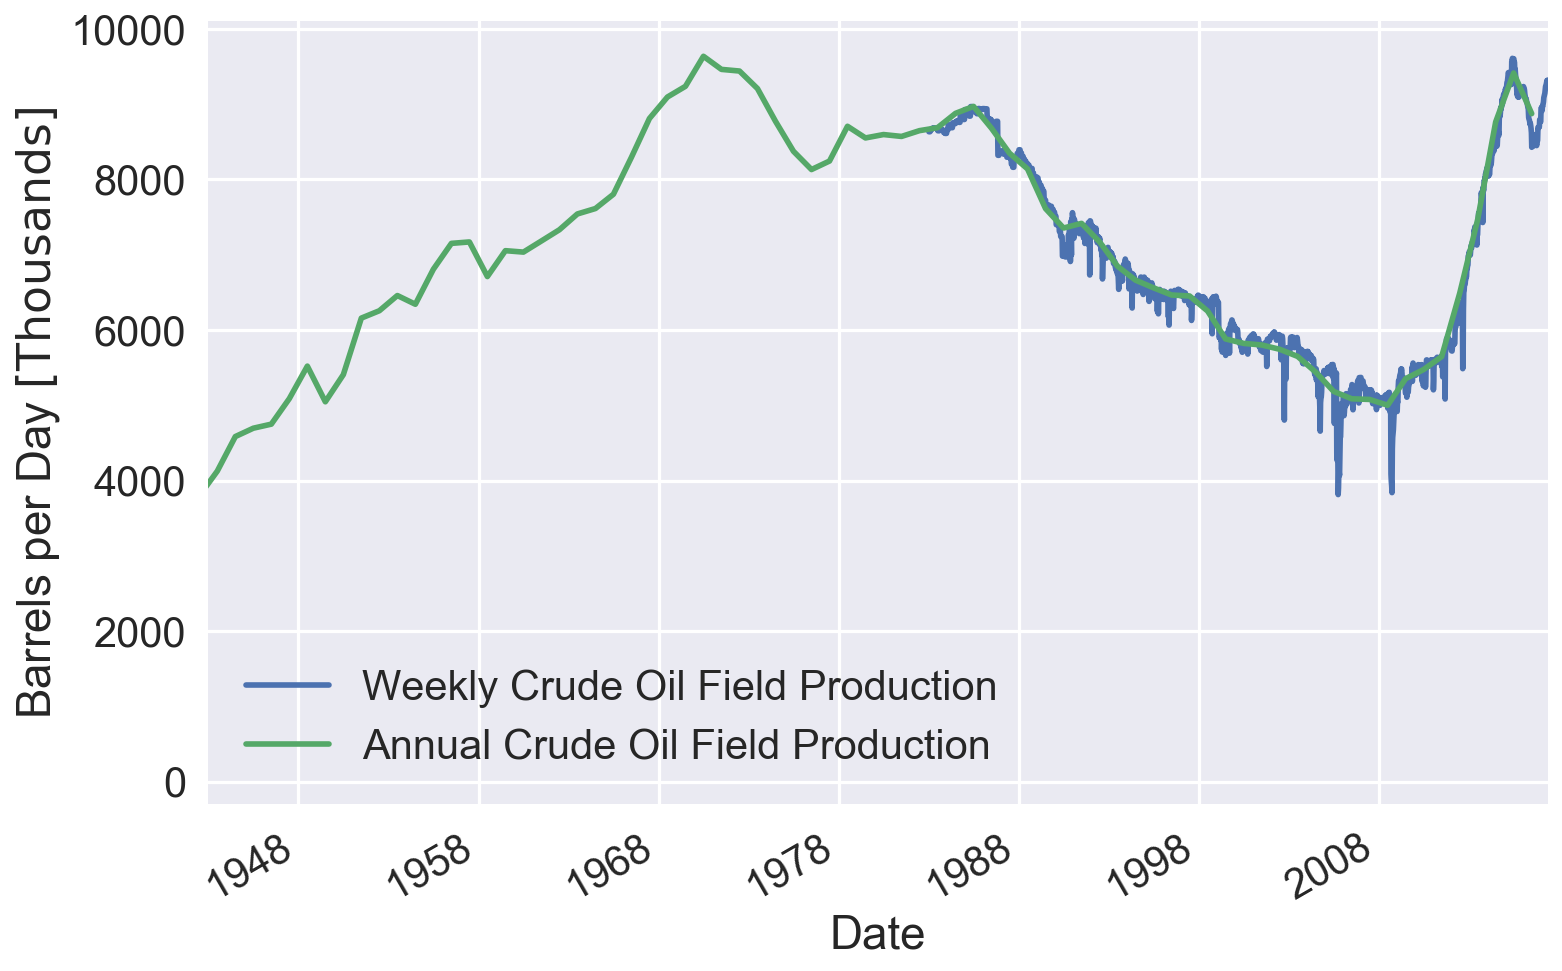

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
monthly.plot(ax=ax)
yearly.plot(ax=ax)
ax.legend(loc='best')
ax.set_xlim(pd.to_datetime('1943-01-01'), None)
ax.set_ylabel(ylabel_thousands_per_day);

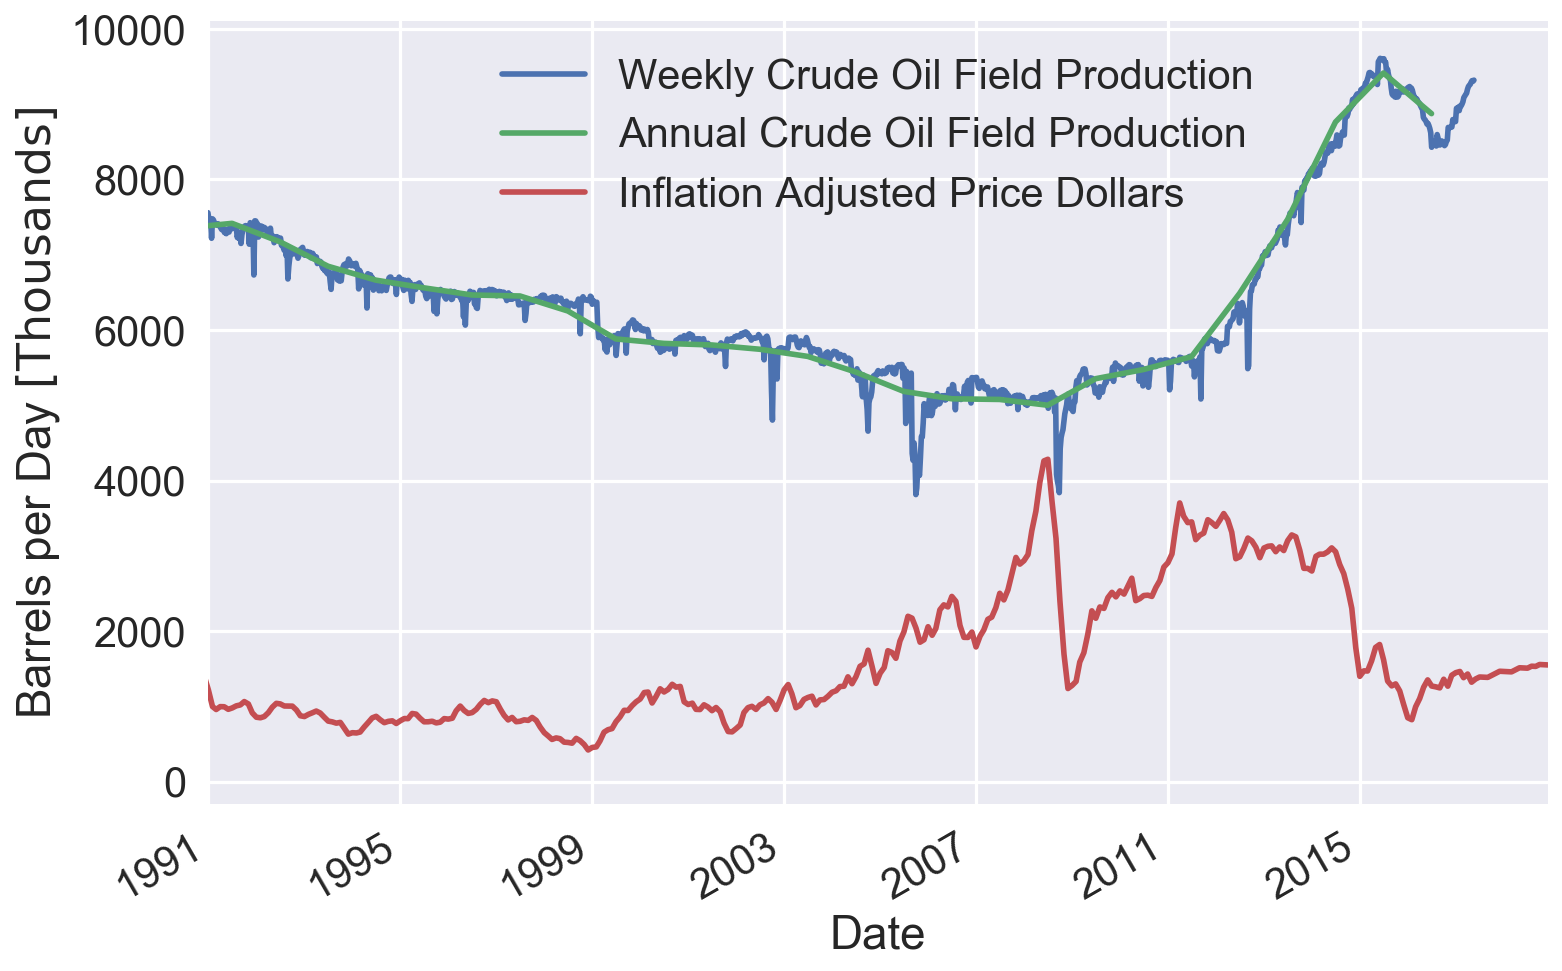

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
monthly.plot(ax=ax)
yearly.plot(ax=ax)

(30.0 * crude_prices['Real']).plot(ax=ax, label="Inflation Adjusted Price Dollars")

ax.legend(loc='best')
ax.set_xlim(pd.to_datetime('1991-01-01'), None)
# ax2.set_ylabel("Inflation Adjusted Price Dollars")
ax.set_ylabel(ylabel_thousands_per_day);

# Bug report

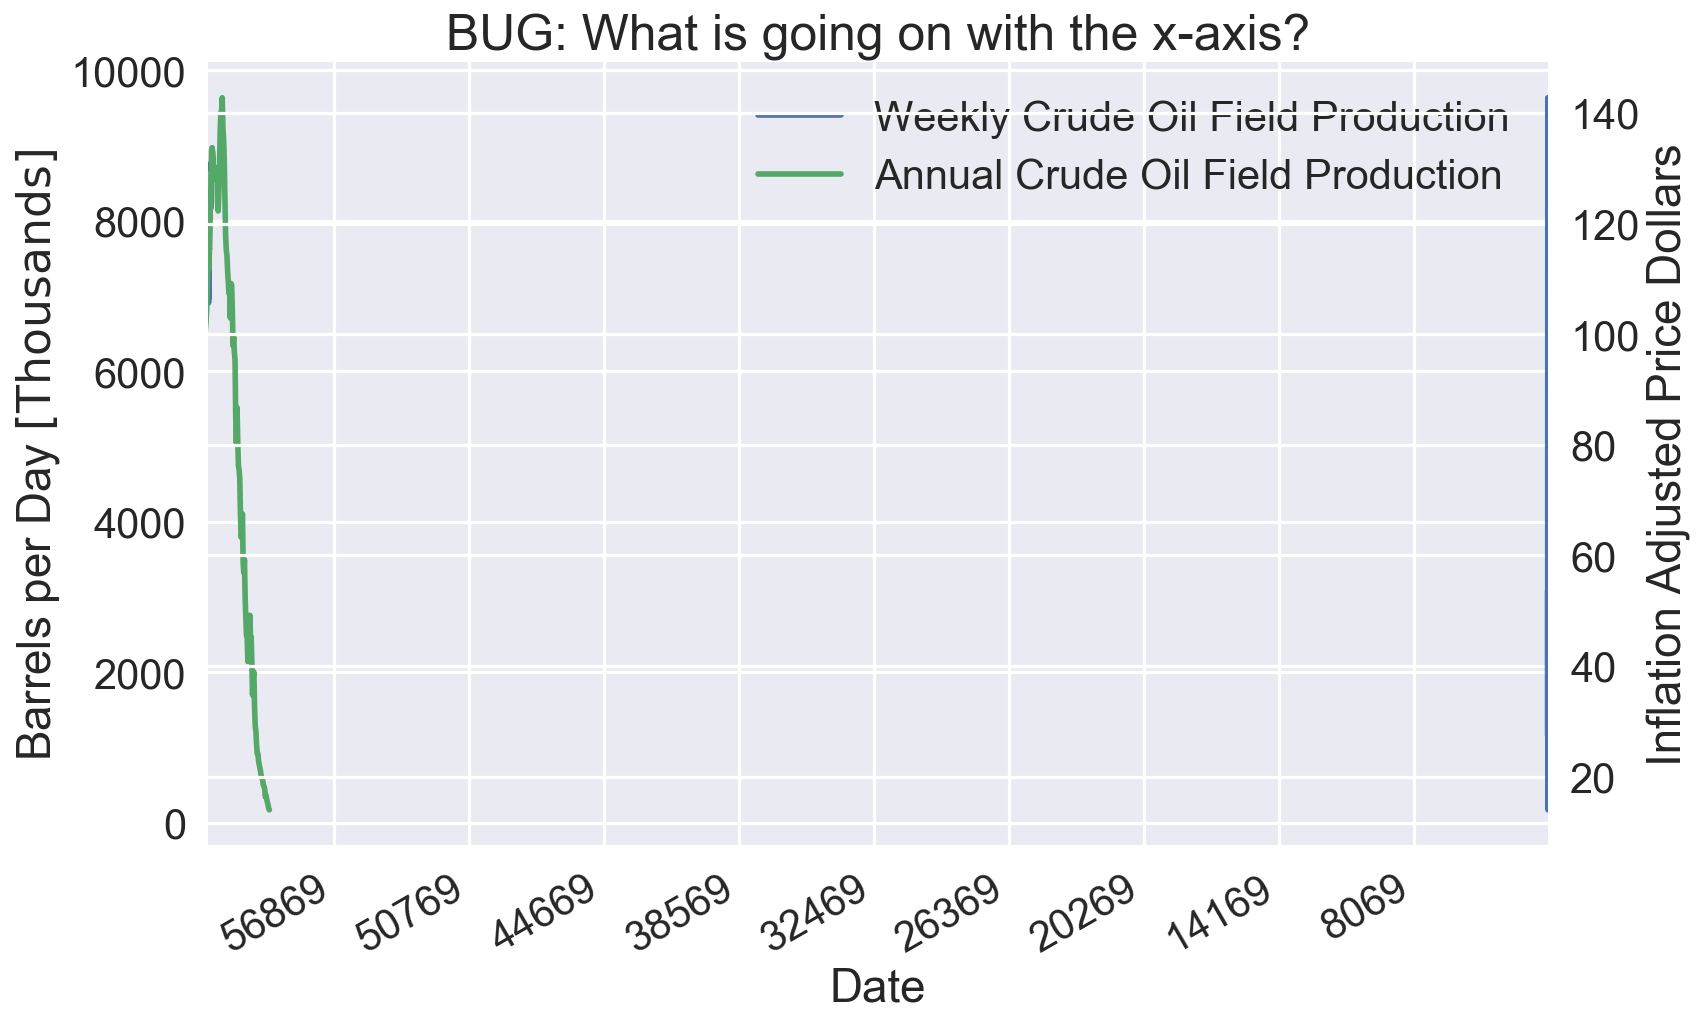

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

monthly.plot(ax=ax)
yearly.plot(ax=ax)
ax2 = ax.twinx()
(crude_prices['Real']).plot(ax=ax2)

ax.legend(loc='best')
ax.set_xlim(pd.to_datetime('1991-01-01'), None)


ax2.set_ylabel("Inflation Adjusted Price Dollars")
ax.set_title("BUG: What is going on with the x-axis?")
ax.set_ylabel(ylabel_thousands_per_day);

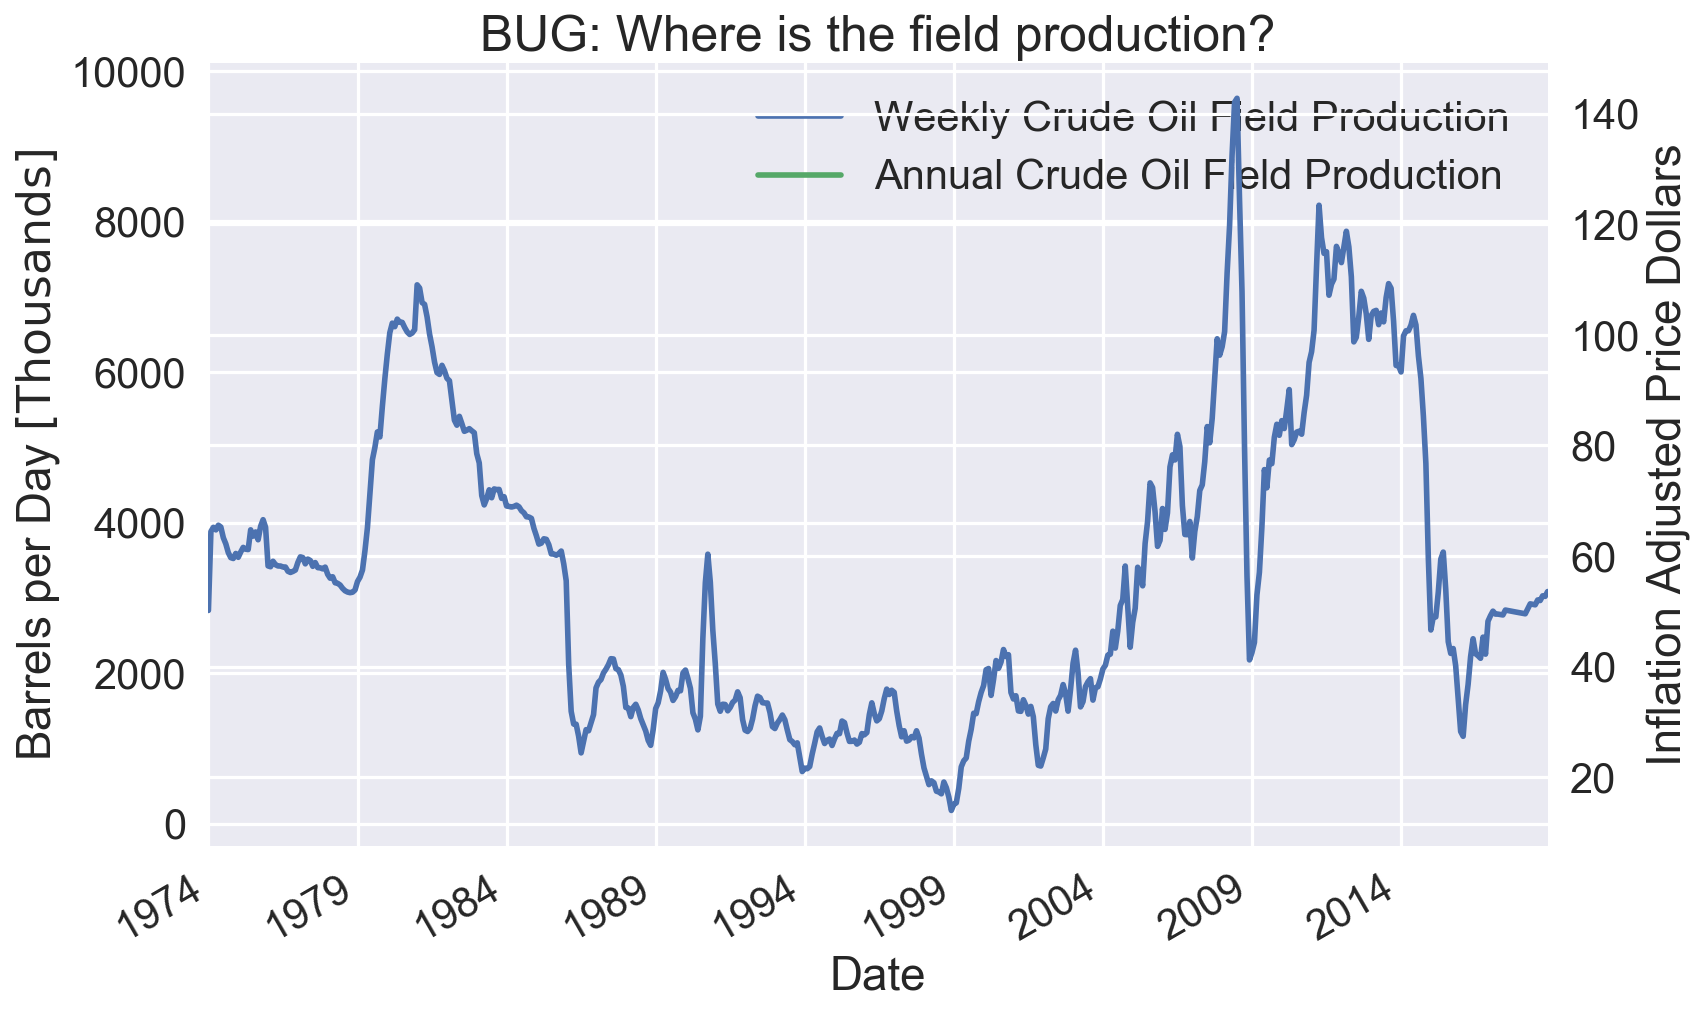

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

monthly.plot(ax=ax)
yearly.plot(ax=ax)

ax.legend(loc='best')
ax.set_xlim(pd.to_datetime('1991-01-01'), None)

ax2 = ax.twinx()
(crude_prices['Real']).plot(ax=ax2)

ax2.set_ylabel("Inflation Adjusted Price Dollars")
ax.set_title("BUG: Where is the field production?")
ax.set_ylabel(ylabel_thousands_per_day);